# Discovering Maximal Periodic Frequent patterns in Big Data Using MaxPFGrowth Algorithm

In this tutorial, we will discuss the first approach to find Maximal Periodic Frequent patterns in big data using top algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover Maximal Periodic Frequent patterns using a single minimum support value.

***

## <a id='basicApproach'>Basic approach: Executing MaxPFGrowth on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the MaxPFGrowth algorithm

In [1]:
from PAMI.periodicFrequentPattern.maximal import MaxPFGrowth  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'

minimumSupportCount = 100  #Users can also specify this constraint between 0 to 1.
maxmunPeriodCount = 5000
seperator = '\t'       

#### Step 3: Execute the MaxPFGrowth algorithm

In [3]:
obj = alg.MaxPFGrowth(iFile=inputFile, minSup=minimumSupportCount,maxPer=maxmunPeriodCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Maximal Periodic Frequent patterns were generated successfully using MAX-PFPGrowth algorithm 


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.save(outFile='maximalPeriodicFrequentPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
periodicFrequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(periodicFrequentPatternsDF)))

Total No of patterns: 3464


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 16.113463163375854


##### Step 5.3: Total Memory consumed by the mining algorithm

In [9]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 575590400
Memory (USS): 536817664


# Advanced Tutorial on Implementing MaxPFGrowth Algorithm

In this tutorial, we will discuss the second approach to find Maximal Periodic Frequent patterns in big data using top algorithm.

 [__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Maximal Periodic Frequent patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the Maximal Periodic FrequentGrowth (MaxPFGrowth) algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the MaxPFGrowth algorithm and pandas data frame

In [1]:
from PAMI.periodicFrequentPattern.maximal import MaxPFGrowth  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
seperator = '\t'
maximumPeriodCount = 50000
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup','maxPer', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of MaxPFGrowth algorithm

#### Step 3: Execute the MaxPFGrowth algorithm using a for loop

In [3]:
algorithm = 'MaxPFGrowth'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.MaxPFGrowth('https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv', minSup=minSupCount,maxPer=maximumPeriodCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount,maximumPeriodCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Maximal Periodic Frequent patterns were generated successfully using MAX-PFPGrowth algorithm 
Maximal Periodic Frequent patterns were generated successfully using MAX-PFPGrowth algorithm 
Maximal Periodic Frequent patterns were generated successfully using MAX-PFPGrowth algorithm 
Maximal Periodic Frequent patterns were generated successfully using MAX-PFPGrowth algorithm 
Maximal Periodic Frequent patterns were generated successfully using MAX-PFPGrowth algorithm 
Maximal Periodic Frequent patterns were generated successfully using MAX-PFPGrowth algorithm 
Maximal Periodic Frequent patterns were generated successfully using MAX-PFPGrowth algorithm 
Maximal Periodic Frequent patterns were generated successfully using MAX-PFPGrowth algorithm 


In [4]:
print(result)

     algorithm  minSup  maxPer  patterns    runtime     memory
0  MaxPFGrowth     100   50000      4083  13.325306  576737280
1  MaxPFGrowth     150   50000      2422  12.025802  574509056
2  MaxPFGrowth     200   50000      1939  12.132649  572346368
3  MaxPFGrowth     250   50000      1587  11.133983  569135104
4  MaxPFGrowth     300   50000      1291  10.527438  566521856


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

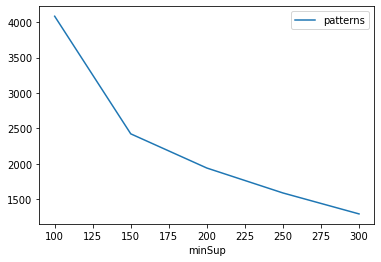

Graph for No Of Patterns is successfully generated!


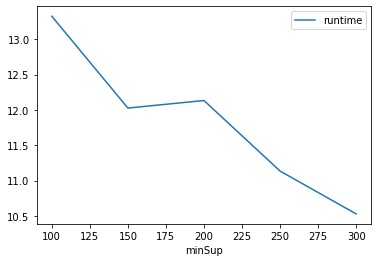

Graph for Runtime taken is successfully generated!


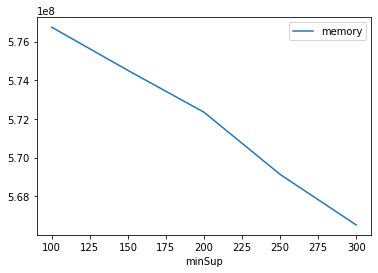

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
